In [119]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [1]:
# Directorio Estadístico Nacional de Unidades Económicas (DENUE) con datos de identificación, ubicación, actividad económica y tamaño de las unidades económicas activas en la CDMX
# Fecha 11/2018 Disponible en: http://www.beta.inegi.org.mx/contenidos/masiva/denue/denue_09_csv.zip

# Save path to data set in a variable
data_file = "../Resources/denue_inegi_09_.csv"

# Use Pandas to read data
df_unieco_pd = pd.read_csv(data_file, low_memory=False) 

# Show the results
df_unieco_pd.head()

C:\Users\bkachava\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,715860,ALMACÉN Y LAVADO DE JICAMA,NaN,115113,Beneficio de productos agrícolas,0 a 5 personas,CALLE,NINGUNO,EJE VIAL,EJE 6 SUR TRABAJADORES SOCIALES,...,Iztapalapa ...,2475,5.0,5556407373,NaN,NaN,Fijo,19.373684,-99.094756,2014-12
1,715862,ALMACÉN Y LAVADO DE JICAMAS,NaN,115113,Beneficio de productos agrícolas,0 a 5 personas,CALLE,NINGUNO,EJE VIAL,EJE 6 SUR TRABAJADORES SOCIALES,...,Iztapalapa ...,2475,5.0,NaN,NaN,NaN,Fijo,19.373684,-99.094756,2014-12
2,715828,BENEFICIO DE PRODUCTOS AGRÍCOLAS,NaN,115113,Beneficio de productos agrícolas,0 a 5 personas,CALLE,NINGUNO,EJE VIAL,EJE 6 SUR TRABAJADORES SOCIALES,...,Iztapalapa ...,2475,5.0,5556003270,NaN,NaN,Fijo,19.373690,-99.094757,2014-12
3,906113,"COMERCIALIZADORA GERMINAL, S.A. DE C.V.",NaN,115113,Beneficio de productos agrícolas,11 a 30 personas,CALLE,NAUYACA,CALLE,COYAMEL,...,Coyoacán ...,1162,12.0,NaN,NaN,NaN,Fijo,19.331241,-99.161781,2014-12
4,709191,COMERCIALIZADORA INTERNACIONAL AGRÍCOLA MACO,COMERCIALIZADORA INTERNACIONAL AGRÍCOLA MACO,115113,Beneficio de productos agrícolas,6 a 10 personas,CERRADA,ORIENTE 229-A,CALLE,ORIENTE 229,...,Iztacalco ...,0310,1.0,NaN,NaN,NaN,Fijo,19.394484,-99.080733,2014-12


In [60]:
# Sistema de Clasificación Industrial de América del Norte 2018 (SCIAN 2018)
# En la actividad de las unidades económicas se utiliza el SCAN  Disponible en:  https://www.inegi.org.mx/contenidos/app/scian/SCIAN2018_Categorias-productos.xlsx

# Save path to data set in a variable
data_file = "../Resources/SCIAN2018_sector_2.csv"

# Use Pandas to read data
df_scian = pd.read_csv(data_file)

# Convert the two digits classification (sector) to six digits (class)
df_scian["codigo_act"] = (df_scian["codigo_act"] * 10000) + 9999

# Show the results
df_scian


,codigo_act,tit_act
0,119999,"Agricultura, cría y explotación de animales, a..."
1,219999,Minería
2,229999,"Generación, transmisión, distribución y comerc..."
3,239999,Construcción
4,349999,Industrias manufactureras
5,439999,Comercio al por mayor
6,469999,Comercio al por menor
7,509999,"Transportes, correos y almacenamiento"
8,519999,Información en medios masivos
9,529999,Servicios financieros y de seguros


In [2]:
# Show the details of the dataframe
df_unieco_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471957 entries, 0 to 471956
Data columns (total 41 columns):
id            471957 non-null int64
nom_estab     471957 non-null object
raz_social    99886 non-null object
codigo_act    471957 non-null int64
nombre_act    471957 non-null object
per_ocu       471957 non-null object
tipo_vial     469847 non-null object
nom_vial      471456 non-null object
tipo_v_e_1    457844 non-null object
nom_v_e_1     466442 non-null object
tipo_v_e_2    457748 non-null object
nom_v_e_2     466371 non-null object
tipo_v_e_3    456459 non-null object
nom_v_e_3     466293 non-null object
numero_ext    469068 non-null object
letra_ext     190196 non-null object
edificio      22480 non-null object
edificio_e    36683 non-null object
numero_int    81548 non-null object
letra_int     73673 non-null object
tipo_asent    470370 non-null object
nomb_asent    471814 non-null object
tipoCenCom    74758 non-null object
nom_CenCom    88160 non-null object
num_local 

In [3]:
# Show the different values of the field per_ocu
df_unieco_pd["per_ocu"].value_counts()

0 a 5 personas        399362
6 a 10 personas        32229
11 a 30 personas       24637
31 a 50 personas        6118
51 a 100 personas       4326
101 a 250 personas      2773
251 y más personas      2512
Name: per_ocu, dtype: int64

In [7]:
# Create a dataframe with certain columns and only the data for three categories 
df_var_mas50 = df_unieco_pd.loc[(df_unieco_pd["per_ocu"] == "51 a 100 personas") | \
                                (df_unieco_pd["per_ocu"] == "101 a 250 personas") | \
                                (df_unieco_pd["per_ocu"] == "251 y más personas"), \
                                ["codigo_act", "nombre_act", "per_ocu", "tipo_vial", \
                                 "cod_postal", "cve_mun", "municipio", "latitud", "longitud"]]
# Show the results
df_var_mas50.head()

,codigo_act,nombre_act,per_ocu,tipo_vial,cod_postal,cve_mun,municipio,latitud,longitud
19,212321,Minería de arena y grava para la construcción,51 a 100 personas,AVENIDA,11520.0,4,Cuajimalpa de Morelos,19.361338,-99.267969
20,212321,Minería de arena y grava para la construcción,51 a 100 personas,AVENIDA,NaN,4,Cuajimalpa de Morelos,19.359586,-99.270587
22,213111,Perforación de pozos petroleros y de gas,51 a 100 personas,PERIFÉRICO,1100.0,16,Miguel Hidalgo,19.433184,-99.209939
47,212232,Minería de plomo y zinc,251 y más personas,AVENIDA,11540.0,16,Miguel Hidalgo,19.435272,-99.201531
53,212321,Minería de arena y grava para la construcción,101 a 250 personas,AVENIDA,4300.0,3,Coyoacán,19.309379,-99.165904


In [16]:
# Show the counters for the data
df_var_mas50.count()

codigo_act    9611
nombre_act    9611
per_ocu       9611
tipo_vial     9214
cod_postal    9496
cve_mun       9611
municipio     9611
latitud       9611
longitud      9611
dtype: int64

In [11]:
len(df_var_mas50["nombre_act"].unique())

669

In [12]:
df_var_mas50["nombre_act"].unique()

array(['Minería de arena y grava para la construcción',
       'Perforación de pozos petroleros y de gas',
       'Minería de plomo y zinc',
       'Extracción de petróleo y gas natural asociado',
       'Captación, tratamiento y suministro de agua realizados por el sector privado',
       'Generación de electricidad a partir de combustibles fósiles',
       'Captación, tratamiento y suministro de agua realizados por el sector público',
       'Suministro de gas natural por ductos al consumidor final',
       'Generación de electricidad a partir de energía eólica',
       'Generación de electricidad a partir de otro tipo de energía',
       'Edificación de vivienda multifamiliar',
       'Construcción de obras para telecomunicaciones',
       'Edificación de inmuebles comerciales y de servicios, excepto la supervisión',
       'Construcción de obras de urbanización',
       'Supervisión de edificación de inmuebles comerciales y de servicios',
       'Edificación de vivienda unifamiliar

In [9]:
df_var_mas50["nombre_act"].value_counts()

Restaurantes con servicio de preparación de alimentos a la carta o de comida corrida                                                                      364
Administración pública en general                                                                                                                         328
Escuelas de educación secundaria general del sector público                                                                                               323
Actividades administrativas de instituciones de bienestar social                                                                                          311
Impartición de justicia y mantenimiento de la seguridad y el orden público                                                                                273
Suministro de personal permanente                                                                                                                         231
Comercio al por menor en supermercados              

In [61]:
# Create bins in which to place values for the sector
bins = df_scian["codigo_act"].tolist()
bins.insert(0, 0)
bins

[0,
 119999,
 219999,
 229999,
 239999,
 349999,
 439999,
 469999,
 509999,
 519999,
 529999,
 539999,
 549999,
 559999,
 569999,
 619999,
 629999,
 719999,
 729999,
 819999,
 939999]

In [62]:
# Create labels for these bins
group_labels = df_scian["tit_act"].tolist()
group_labels

['Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza',
 'Minería',
 'Generación, transmisión, distribución y comercialización de energía eléctrica, suministro de agua y de gas natural por ductos al consumidor final',
 'Construcción',
 'Industrias manufactureras',
 'Comercio al por mayor',
 'Comercio al por menor',
 'Transportes, correos y almacenamiento',
 'Información en medios masivos',
 'Servicios financieros y de seguros',
 'Servicios inmobiliarios y de alquiler de bienes muebles e intangibles',
 'Servicios profesionales, científicos y técnicos',
 'Corporativos',
 'Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación',
 'Servicios educativos',
 'Servicios de salud y de asistencia social',
 'Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos',
 'Servicios de alojamiento temporal y de preparación de alimentos y bebidas',
 'Otros servicios excepto actividades gubernamentales',
 'Actividades l

In [63]:
# Place the data series into a new column inside of the DataFrame
df_var_mas50["Sector"] = pd.cut(df_var_mas50["codigo_act"], bins, labels=group_labels)
df_var_mas50.tail()

,codigo_act,nombre_act,per_ocu,tipo_vial,cod_postal,cve_mun,municipio,latitud,longitud,Sector
471656,931410,Impartición de justicia y mantenimiento de la ...,51 a 100 personas,AVENIDA,1020.0,10,Álvaro Obregón,19.358126,-99.189492,"Actividades legislativas, gubernamentales, de ..."
471669,931510,Regulación y fomento de actividades para mejor...,251 y más personas,AVENIDA,7010.0,5,Gustavo A. Madero,19.500056,-99.117796,"Actividades legislativas, gubernamentales, de ..."
471687,931610,Actividades administrativas de instituciones d...,51 a 100 personas,CALLE,4200.0,3,Coyoacán,19.350110,-99.133270,"Actividades legislativas, gubernamentales, de ..."
471955,931410,Impartición de justicia y mantenimiento de la ...,101 a 250 personas,CALLE,7469.0,5,Gustavo A. Madero,19.485036,-99.102218,"Actividades legislativas, gubernamentales, de ..."
471956,931410,Impartición de justicia y mantenimiento de la ...,251 y más personas,CALLE,6090.0,15,Cuauhtémoc,19.424302,-99.127341,"Actividades legislativas, gubernamentales, de ..."


In [64]:
# Show the different values of the field Sector
df_var_mas50["Sector"].value_counts()

Comercio al por menor                                                                                                                                1369
Servicios educativos                                                                                                                                 1205
Industrias manufactureras                                                                                                                            1158
Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales                           1141
Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación                                                                    818
Comercio al por mayor                                                                                                                                 753
Servicios de alojamiento temporal y de preparación de alimentos y bebidas   

In [131]:
# Show the different values of the field municipio

# Create a dataframe with the number of "unidades económicas" by municipio and sector
df_mun = pd.DataFrame(df_var_mas50["municipio"].value_counts())

# Reset index
df_mun.reset_index(inplace=True)

# Show results
df_mun.columns
df_mun

,index,municipio
0,Cuauhtémoc,1652
1,Miguel Hidalgo,1543
2,Benito Juárez,1080
3,Iztapalapa,843
4,Álvaro Obregón,751
5,Coyoacán,668
6,Gustavo A. Madero,637
7,Azcapotzalco,550
8,Tlalpan,432
9,Venustiano Carranza,386


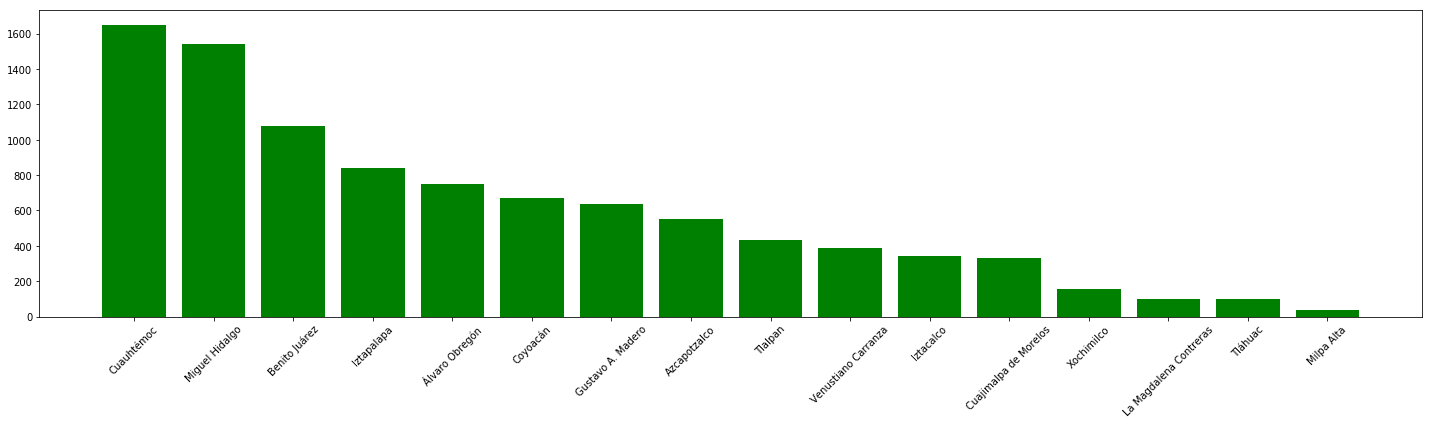

In [139]:
# Create a bar chart based upon the above data
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)   #'vertical'
plt.bar(df_mun["index"], df_mun["municipio"], color="g", align="center")
plt.tight_layout()

In [87]:
# Create a dataframe with the number of "unidades económicas" by municipio and sector
df_secmun = pd.DataFrame(df_var_mas50.groupby(['municipio', 'Sector'])["codigo_act"].count())

# Reset index
df_secmun.reset_index(inplace=True)

# Show results
df_secmun.columns
df_secmun

,municipio,Sector,codigo_act
0,Azcapotzalco,"Generación, transmisión, distribución y comerc...",1
1,Azcapotzalco,Construcción,12
2,Azcapotzalco,Industrias manufactureras,151
3,Azcapotzalco,Comercio al por mayor,74
4,Azcapotzalco,Comercio al por menor,76
5,Azcapotzalco,"Transportes, correos y almacenamiento",58
6,Azcapotzalco,Información en medios masivos,12
7,Azcapotzalco,Servicios financieros y de seguros,2
8,Azcapotzalco,Servicios inmobiliarios y de alquiler de biene...,1
9,Azcapotzalco,"Servicios profesionales, científicos y técnicos",10


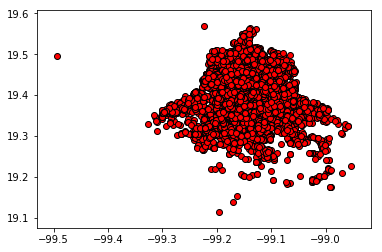

In [93]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(df_var_mas50["longitud"], df_var_mas50["latitud"], marker="o", facecolors="red", edgecolors="black")
plt.show()

In [97]:
xochimilco_df = df_var_mas50[df_var_mas50["municipio"] == "Xochimilco"]
xochimilco_df.count()

codigo_act    156
nombre_act    156
per_ocu       156
tipo_vial     153
cod_postal    154
cve_mun       156
municipio     156
latitud       156
longitud      156
Sector        156
dtype: int64

In [108]:
# Store latitude and longitude in locations
locations = xochimilco_df[["latitud", "longitud"]].head()
#locations = df_var_mas50[["latitud", "longitud"]]    #.head()
locations

,latitud,longitud
142,19.261726,-99.113652
269,19.248081,-99.094335
274,19.269577,-99.127090
432,19.263420,-99.116329
807,19.269983,-99.115156


In [107]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer  weights=rating, 
heat_layer = gmaps.heatmap_layer(locations, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [109]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [111]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [67]:
df_var_mas50.to_csv("../Output/mas50.csv", encoding="ISO-8859-1", index=False, header=True)

In [ ]:
# Display a statistical overview of the DataFrame
#data_file_pd.describe()